# Forecast

## Setup

In [1]:
import sys
sys.path.append("..")

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy as sp

from joblib import Parallel, delayed
from itertools import product
from tqdm import tqdm
from pathlib import Path

# Library settings
pd.options.display.max_columns = 999
plt.rcParams["figure.figsize"] = (16, 4)


## Load data

In [2]:
sales = pd.read_csv("../data/sales_train_evaluation.csv")
sales.head()


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,d_245,d_246,d_247,d_248,d_249,d_250,d_251,d_252,d_253,d_254,d_255,d_256,d_257,d_258,d_259,d_260,d_261,d_262,d_263,d_264,d_265,d_266,d_267,d_268,d_269,d_270,d_271,d_272,d_273,d_274,d_275,d_276,d_277,d_278,d_279,d_280,d_281,d_282,d_283,d_284,d_285,d_286,d_287,d_288,d_289,d_290,d_291,d_292,d_293,d_294,d_295,d_296,d_297,d_298,d_299,d_300,d_301,d_302,d_303,d_304,d_305,d_306,d_307,d_308,d_309,d_310,d_311,d_312,d_313,d_314,d_315,d_316,d_317,d_318,d_319,d_320,d_321,d_322,d_323,d_324,d_325,d_326,d_327,d_328,d_329,d_330,d_331,d_332,d_333,d_334,d_335,d_336,d_337,d_338,d_339,d_340,d_341,d_342,d_343,d_344,d_345,d_346,d_347,d_348,d_349,d_350,d_351,d_352,d_353,d_354,d_355,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,d_366,d_367,d_368,d_369,d_370,d_371,d_372,d_373,d_374,d_375,d_376,d_377,d_378,d_379,d_380,d_381,d_382,d_383,d_384,d_385,d_386,d_387,d_388,d_389,d_390,d_391,d_392,d_393,d_394,d_395,d_396,d_397,d_398,d_399,d_400,d_401,d_402,d_403,d_404,d_405,d_406,d_407,d_408,d_409,d_410,d_411,d_412,d_413,d_414,d_415,d_416,d_417,d_418,d_419,d_420,d_421,d_422,d_423,d_424,d_425,d_426,d_427,d_428,d_429,d_430,d_431,d_432,d_433,d_434,d_435,d_436,d_437,d_438,d_439,d_440,d_441,d_442,d_443,d_444,d_445,d_446,d_447,d_448,d_449,d_450,d_451,d_452,d_453,d_454,d_455,d_456,d_457,d_458,d_459,d_460,d_461,d_462,d_463,d_464,d_465,d_466,d_467,d_468,d_469,d_470,d_471,d_472,d_473,d_474,d_475,d_476,d_477,d_478,d_479,d_480,d_481,d_482,d_483,d_484,d_485,d_486,d_487,d_488,d_489,d_490,d_491,d_492,d_493,...,d_1443,d_1444,d_1445,d_1446,d_1447,d_1448,d_1449,d_1450,d_1451,d_1452,d_1453,d_1454,d_1455,d_1456,d_1457,d_1458,d_1459,d_1460,d_1461,d_1462,d_1463,d_1464,d_1465,d_1466,d_1467,d_1468,d_1469,d_1470,d_1471,d_1472,d_1473,d_1474,d_1475,d_1476,d_1477,d_1478,d_1479,d_1480,d_1481,d_1482,d_1483,d_1484,d_1485,d_1486,d_1487,d_1488,d_1489,d_1490,d_1491,d_1492,d_1493,d_1494,d_1495,d_1496,d_1497,d_1498,d_1499,d_1500,d_1501,d_1502,d_1503,d_1504,d_1505,d_1506,d_1507,d_1508,d_1509,d_1510,d_1511,d_1512,d_1513,d_1514,d_1515,d_1516,d_1517,d_1518,d_1519,d_1520,d_1521,d_1522,d_1523,d_1524,d_1525,d_1526,d_1527,d_1528,d_1529,d_1530,d_1531,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,d_1552,d_1553,d_1554,d_1555,d_1556,d_1557,d_1558,d_1559,d_1560,d_1561,d_1562,d_1563,d_1564,d_1565,d_1566,d_1567,d_1568,d_1569,d_1570,d_1571,d_1572,d_1573,d_1574,d_1575,d_1576,d_1577,d_1578,d_1579,d_1580,d_1581,d_1582,d_1583,d_1584,d_1585,d_1586,d_1587,d_1588,d_1589,d_1590,d_1591,d_1592,d_1593,d_1594,d_1595,d_1596,d_1597,d_1598,d_1599,d_

In [3]:
calendar = pd.read_csv("../data/calendar.csv", parse_dates=["date"])
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [4]:
sell_prices = pd.read_csv("../data/sell_prices.csv")
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


## Prepare data

In [36]:
def prepare_data(sales, calendar, sell_prices):
    hierarchy_df = sales.iloc[:, 1:6].copy()
    df = sales.drop(columns=["id", "dept_id", "cat_id", "state_id"])
    df = df.reset_index().rename(columns={"index":"unique_id"})
    # df["unique_id"] = df["unique_id"].astype("str")
    df_long = pd.melt(df, id_vars=df.columns[:3], var_name="d", value_name="sales")
    df_long = df_long.merge(calendar[["d", "wm_yr_wk"]], on="d", how="left")
    df_long = df_long.merge(sell_prices, on=["item_id", "store_id", "wm_yr_wk"], how="left")
    df_long["dollar_sales"] = df_long["sales"] * df_long["sell_price"]
    df_long.loc[df_long.sales == 0, "dollar_sales"] = 0
    df_long["d"] = df_long["d"].str[2:].astype("int")
    df = pd.pivot_table(df_long, values=["sales", "dollar_sales"], index=["d"], columns=["unique_id"])
    
    path = Path("../data/processed/")
    hierarchy_df.to_csv(path / "hierarchy.csv", index=False)
    df["sales"].to_csv(path / "sales.csv")
    df["dollar_sales"].to_csv(path / "dollar_sales.csv")
    print(f"Data written to {path}")

In [16]:
prepare_data(sales, calendar, sell_prices)

Data written to ../data/processed


In [27]:
Y = pd.read_csv("../data/processed/sales.csv")
Y = Y.set_index("d")
Y.columns.name = "unique_id"
Y.head()

unique_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,30000,30001,30002,30003,30004,30005,30006,30007,30008,30009,30010,30011,30012,30013,30014,30015,30016,30017,30018,30019,30020,30021,30022,30023,30024,30025,30026,30027,30028,30029,30030,30031,30032,30033,30034,30035,30036,30037,30038,30039,30040,30041,30042,30043,30044,30045,30046,30047,30048,30049,30050,30051,30052,30053,30054,30055,30056,30057,30058,30059,30060,30061,30062,30063,30064,30065,30066,30067,30068,30069,30070,30071,30072,30073,30074,30075,30076,30077,30078,30079,30080,30081,30082,30083,30084,30085,30086,30087,30088,30089,30090,30091,30092,30093,30094,30095,30096,30097,30098,30099,30100,30101,30102,30103,30104,30105,30106,30107,30108,30109,30110,30111,30112,30113,30114,30115,30116,30117,30118,30119,30120,30121,30122,30123,30124,30125,30126,30127,30128,30129,30130,30131,30132,30133,30134,30135,30136,30137,30138,30139,30140,30141,30142,30143,30144,30145,30146,30147,30148,30149,30150,30151,30152,30153,30154,30155,30156,30157,30158,30159,30160,30161,30162,30163,30164,30165,30166,30167,30168,30169,30170,30171,30172,30173,30174,30175,30176,30177,30178,30179,30180,30181,30182,30183,30184,30185,30186,30187,30188,30189,30190,30191,30192,30193,30194,30195,30196,30197,30198,30199,30200,30201,30202,30203,30204,30205,30206,30207,30208,30209,30210,30211,30212,30213,30214,30215,30216,30217,30218,30219,30220,30221,30222,30223,30224,30225,30226,30227,30228,30229,30230,30231,30232,30233,30234,30235,30236,30237,30238,30239,30240,30241,30242,30243,30244,30245,30246,30247,30248,30249,30250,30251,30252,30253,30254,30255,30256,30257,30258,30259,30260,30261,30262,30263,30264,30265,30266,30267,30268,30269,30270,30271,30272,30273,30274,30275,30276,30277,30278,30279,30280,30281,30282,30283,30284,30285,30286,30287,30288,30289,30290,30291,30292,30293,30294,30295,30296,30297,30298,30299,30300,30301,30302,30303,30304,30305,30306,30307,30308,30309,30310,30311,30312,30313,30314,30315,30316,30317,30318,30319,30320,30321,30322,30323,30324,30325,30326,30327,30328,30329,30330,30331,30332,30333,30334,30335,30336,30337,30338,30339,30340,

In [28]:
Y.isna().sum().sum()

0

In [29]:
Y_dollar = pd.read_csv("../data/processed/dollar_sales.csv")
Y_dollar = Y_dollar.set_index("d")
Y_dollar.columns.name = "unique_id"
Y_dollar.head()

unique_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,30000,30001,30002,30003,30004,30005,30006,30007,30008,30009,30010,30011,30012,30013,30014,30015,30016,30017,30018,30019,30020,30021,30022,30023,30024,30025,30026,30027,30028,30029,30030,30031,30032,30033,30034,30035,30036,30037,30038,30039,30040,30041,30042,30043,30044,30045,30046,30047,30048,30049,30050,30051,30052,30053,30054,30055,30056,30057,30058,30059,30060,30061,30062,30063,30064,30065,30066,30067,30068,30069,30070,30071,30072,30073,30074,30075,30076,30077,30078,30079,30080,30081,30082,30083,30084,30085,30086,30087,30088,30089,30090,30091,30092,30093,30094,30095,30096,30097,30098,30099,30100,30101,30102,30103,30104,30105,30106,30107,30108,30109,30110,30111,30112,30113,30114,30115,30116,30117,30118,30119,30120,30121,30122,30123,30124,30125,30126,30127,30128,30129,30130,30131,30132,30133,30134,30135,30136,30137,30138,30139,30140,30141,30142,30143,30144,30145,30146,30147,30148,30149,30150,30151,30152,30153,30154,30155,30156,30157,30158,30159,30160,30161,30162,30163,30164,30165,30166,30167,30168,30169,30170,30171,30172,30173,30174,30175,30176,30177,30178,30179,30180,30181,30182,30183,30184,30185,30186,30187,30188,30189,30190,30191,30192,30193,30194,30195,30196,30197,30198,30199,30200,30201,30202,30203,30204,30205,30206,30207,30208,30209,30210,30211,30212,30213,30214,30215,30216,30217,30218,30219,30220,30221,30222,30223,30224,30225,30226,30227,30228,30229,30230,30231,30232,30233,30234,30235,30236,30237,30238,30239,30240,30241,30242,30243,30244,30245,30246,30247,30248,30249,30250,30251,30252,30253,30254,30255,30256,30257,30258,30259,30260,30261,30262,30263,30264,30265,30266,30267,30268,30269,30270,30271,30272,30273,30274,30275,30276,30277,30278,30279,30280,30281,30282,30283,30284,30285,30286,30287,30288,30289,30290,30291,30292,30293,30294,30295,30296,30297,30298,30299,30300,30301,30302,30303,30304,30305,30306,30307,30308,30309,30310,30311,30312,30313,30314,30315,30316,30317,30318,30319,30320,30321,30322,30323,30324,30325,30326,30327,30328,30329,30330,30331,30332,30333,30334,30335,30336,30337,30338,30339,30340,

In [37]:
Y_dollar.isna().sum().sum()

0

In [34]:
hierarchy_df = pd.read_csv("../data/processed/hierarchy.csv")
hierarchy_df

## Build S matrix

In [41]:
hierarchy_df = pd.read_csv("../data/processed/hierarchy.csv")
hierarchy_df.head()

,Unnamed: 0,item_id,dept_id,cat_id,store_id,state_id
0,0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
1,1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA
2,2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA
3,3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA
4,4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA


In [42]:
hierarchy_df = hierarchy_df.iloc[:, 1:].copy()

In [43]:
hierarchy_df

,item_id,dept_id,cat_id,store_id,state_id
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA
...,...,...,...,...,...
30485,FOODS_3_823,FOODS_3,FOODS,WI_3,WI
30486,FOODS_3_824,FOODS_3,FOODS,WI_3,WI
30487,FOODS_3_825,FOODS_3,FOODS,WI_3,WI
30488,FOODS_3_826,FOODS_3,FOODS,WI_3,WI


In [44]:
agg_levels = (
    tuple(["TOTAL"]),
    tuple(['state_id']),
    tuple(['store_id']),
    tuple(['cat_id']),
    tuple(['dept_id']),
    tuple(['state_id', 'cat_id']),
    tuple(['state_id', 'dept_id']),
    tuple(['store_id', 'cat_id']),
    tuple(['store_id', 'dept_id']),
    tuple(['item_id']),
    tuple(['item_id', 'state_id']),
    tuple(['item_id', 'store_id']),
)

In [45]:
def generate_Smatrix(hierarchy_df, agg_levels, sparse=True):
    arr = np.array
    eye = np.eye
    stack = np.row_stack
    
    if sparse:
        arr = sp.sparse.csr_array
        eye = sp.sparse.eye
        stack = sp.sparse.vstack

    def build_row(hierarchy_df, level, comb):
        row = (hierarchy_df.loc[:, level] == comb).apply(lambda x: all(x), axis=1).astype("int16")
        return row
    
    top_row = np.ones(len(hierarchy_df))
    S_rows = [top_row]

    for level in agg_levels[1:-1]:
        print(level)
        combinations = hierarchy_df.loc[:, level].drop_duplicates().to_numpy()
        rows = Parallel(n_jobs=8)(
            delayed(build_row)(hierarchy_df, level, comb) for comb in combinations
        )
        S_rows.extend(rows)

    S_top = arr(S_rows)
    S_bottom = eye(len(hierarchy_df))
    S = stack([S_top, S_bottom])
    return S

In [51]:
Y.to_numpy().shape

(1941, 30490)

In [46]:
S = generate_Smatrix(hierarchy_df, agg_levels)

('state_id',)
('store_id',)
('cat_id',)
('dept_id',)
('state_id', 'cat_id')
('state_id', 'dept_id')
('store_id', 'cat_id')
('store_id', 'dept_id')
('item_id',)
('item_id', 'state_id')


In [48]:
path = Path("../data/processed/S.npz")
sp.sparse.save_npz(path, S)

## Generate timeseries for the full hierarchy

In [10]:
B = pd.pivot_table(data, values=["sales"], index=["id"], columns=["d"]).fillna(0).to_numpy()

In [11]:
Y = S @ B

In [12]:
Y.shape

(42840, 1941)

array([[3.2631e+04, 3.1749e+04, 2.3783e+04, ..., 4.2552e+04, 5.1518e+04,
        5.4338e+04],
       [1.4195e+04, 1.3805e+04, 1.0108e+04, ..., 1.7430e+04, 2.3103e+04,
        2.4644e+04],
       [9.4380e+03, 9.6300e+03, 6.7780e+03, ..., 1.2303e+04, 1.3681e+04,
        1.4815e+04],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [20]:
calendar = pd.read_csv("../data/calendar.csv", parse_dates=["date"])

In [21]:
calendar["d"] = calendar["d"].str[2:].astype("int")

In [40]:
y = Y[0, :]
y = pd.Series(y, index=pd.RangeIndex(1, len(y)+1), name="y")

In [41]:
y

1       32631.0
2       31749.0
3       23783.0
4       25412.0
5       19146.0
         ...   
1937    37096.0
1938    36963.0
1939    42552.0
1940    51518.0
1941    54338.0
Name: y, Length: 1941, dtype: float64

In [42]:
y_df = pd.merge(y, calendar, how="left", left_index=True, right_on="d")

,y,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,32631.0,2011-01-29,11101,Saturday,1,1,2011,1,NaN,NaN,NaN,NaN,0,0,0
1,31749.0,2011-01-30,11101,Sunday,2,1,2011,2,NaN,NaN,NaN,NaN,0,0,0
2,23783.0,2011-01-31,11101,Monday,3,1,2011,3,NaN,NaN,NaN,NaN,0,0,0
3,25412.0,2011-02-01,11101,Tuesday,4,2,2011,4,NaN,NaN,NaN,NaN,1,1,0
4,19146.0,2011-02-02,11101,Wednesday,5,2,2011,5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,37096.0,2016-05-18,11616,Wednesday,5,5,2016,1937,NaN,NaN,NaN,NaN,0,0,0
1937,36963.0,2016-05-19,11616,Thursday,6,5,2016,1938,NaN,NaN,NaN,NaN,0,0,0
1938,42552.0,2016-05-20,11616,Friday,7,5,2016,1939,NaN,NaN,NaN,NaN,0,0,0
1939,51518.0,2016-05-21,11617,Saturday,1,5,2016,1940,NaN,NaN,NaN,NaN,0,0,0


In [22]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,1968,NaN,NaN,NaN,NaN,0,0,0


In [72]:
gby = data.groupby(["d", "item_id"])["sales"].sum().unstack()
gby

item_id  FOODS_1_001  FOODS_1_002  FOODS_1_003  FOODS_1_004  FOODS_1_005  \
d                                                                          
1                  6            4           14            0           34   
2                  6            5            8            0           32   
3                  4            7            3            0           13   
4                  6            4            6            0           20   
5                  7            3            3            0           10   
...              ...          ...          ...          ...          ...   
1937               7            5            7           62           25   
1938               5            0            7           71           19   
1939               7            6           10           75           25   
1940               5            6            6           83           17   
1941               9            4            5           93           19   

item_id  FOODS_1_006  FOODS_1_008  FOODS_1_009  FOODS_1_010  FOODS_1_011  \
d                                                                          
1                 16            0            0            0            7   
2                  9            0            0            0            1   
3                 20            0            0            0            5   
4                 16            0            0            0            1   
5                 14            0            0            0            0   
...              ...          ...          ...          ...          ...   
1937              13            3            2            2            3   
1938               9            2            7            4            8   
1939               9            1           10            9            5   
1940              11            0           10            6           16   
1941               5            4           13           10           14   

item_id  FOODS_1_012  FOODS_1_013  FOODS_1_014  FOODS_1_015  FOODS_1_016  \
d                                                                          
1                  0            8            0            0           13   
2                  0            9            0            0            5   
3                  0           20            0            0            0   
4                  0            8            0            0            1   
5                  0           14            0            0            7   
...              ...          ...          ...          ...          ...   
1937              36            8           12            8            6   
1938              53            9           23            4            9   
1939              57            4           18           14            8   
1940              61           20           13           22            8   
1941              56           11            8           11            2   

item_id  FOODS_1_017  FOODS_1_018  FOODS_1_019  FOODS_1_020  FOODS_1_021  \
d                                                                          
1                  0           47          106           14            0   
2                  0           26          104           22            0   
3                  0           30           47           21            0   
4                  0           24           69           12            0   
5                  0           13           51            6            0   
...              ...          ...          ...          ...          ...   
1937              13           71           39           13            4   
1938              16           99           62           13            5   
1939              12          100           73           17            9   
1940              10          128           92           12           12   
1941              10          105           54           12           19   

item_id  FOODS_1_022  FOODS_1_023  FOODS_1_0

<AxesSubplot: xlabel='d'>

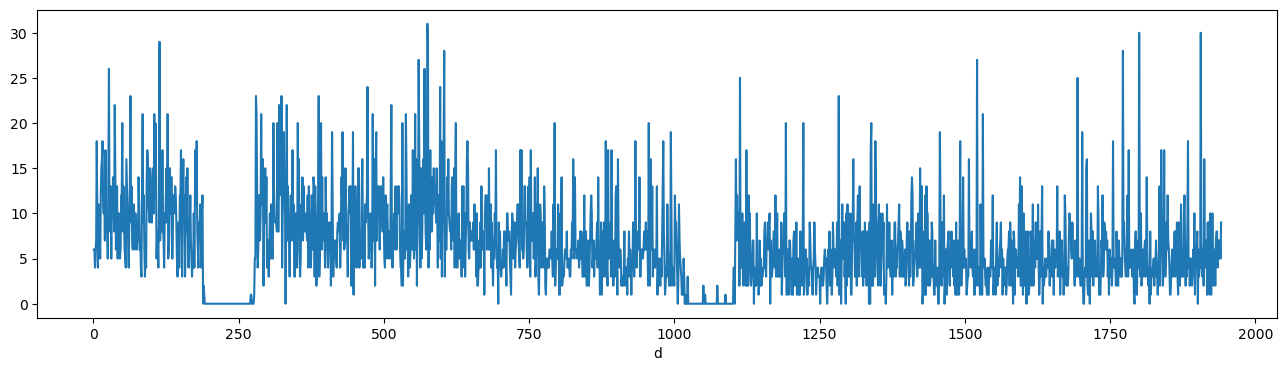

In [73]:
gby["FOODS_1_001"].plot()

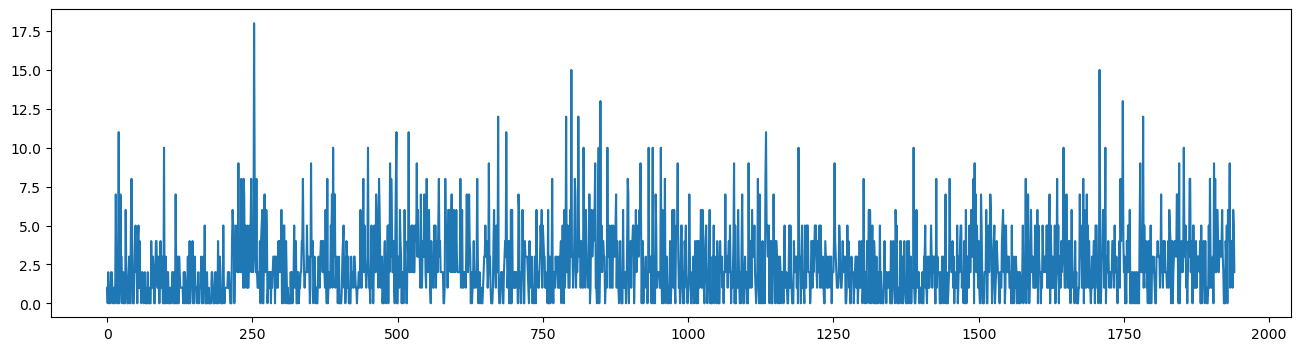

In [126]:
plt.plot(Y[2000])

In [84]:
data["unique_id"] = pd.factorize(data["id"])[0]

In [106]:
Y_df = data[["id", "d", "date", "sales"]].copy()

In [107]:
Y_df["id"] = pd.factorize(Y_df["id"])[0]

In [109]:
Y_df.columns = ["unique_id", "d", "ds", "y"]

In [112]:
Y_train_df =  Y_df[Y_df.d <= 1913]
Y_test_df = Y_df[Y_df.d > 1913]

In [119]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ETS

<AxesSubplot: >

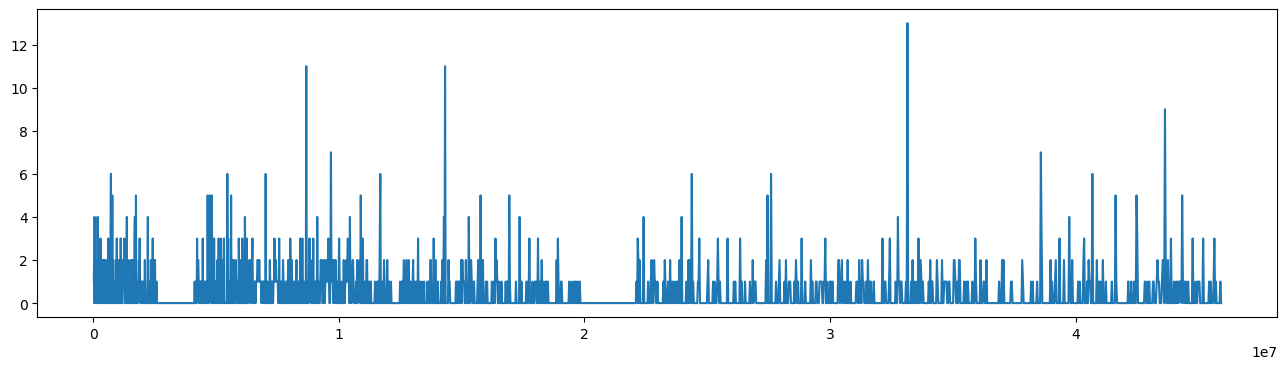

In [123]:
Y_train_df.loc[Y_train_df.unique_id == 5, "y"].plot()

In [133]:
Y_train_df = Y_train_df.drop(columns=["d"])

In [149]:
Y_test_df = Y_test_df.drop(columns=["d"])

In [151]:
horizon = 28

models = [
    ETS(season_length=7, model='ZZA')
]
model = StatsForecast(
    df=Y_train_df, 
    models=models,
    freq='D', 
    n_jobs=-1,
)

Y_hat_df = model.forecast(horizon).reset_index()
Y_hat_df.head()

,unique_id,ds,ETS
0,0,2016-04-25,0.899903
1,0,2016-04-26,0.846378
2,0,2016-04-27,0.929352
3,0,2016-04-28,0.857042
4,0,2016-04-29,1.131974


<AxesSubplot: xlabel='ds'>

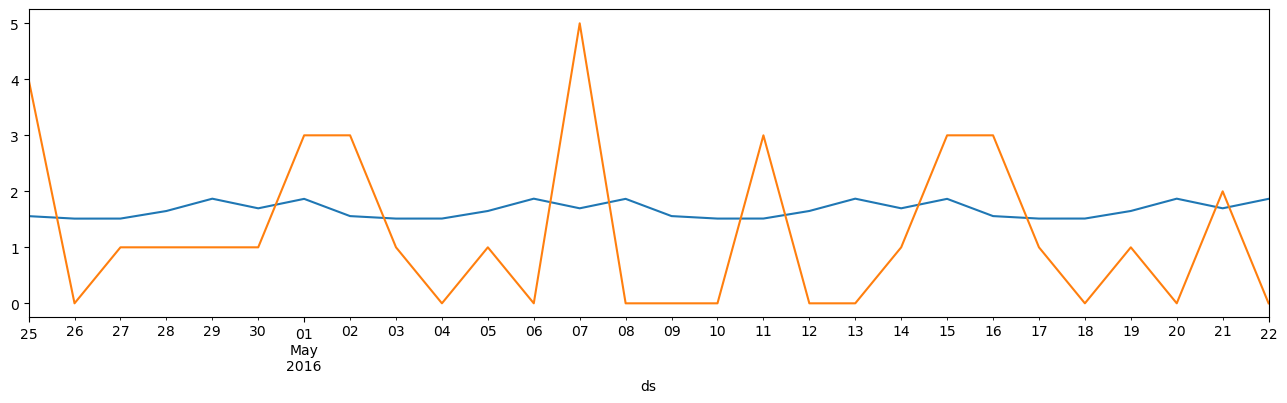

In [155]:
i = 10000
Y_hat_df.loc[Y_hat_df.unique_id == i].set_index("ds")["ETS"].plot()
Y_test_df.loc[Y_test_df.unique_id == i].set_index("ds")["y"].plot()